Import necessary libraries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Load and Preprocess the dataset:

In [2]:
tips = pd.read_csv('tips.csv')


In [3]:
tips.head()
tips.info()
tips.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
tips.isnull().sum()


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


**Exploratory Data Analysis (EDA)**

In [5]:
tips.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


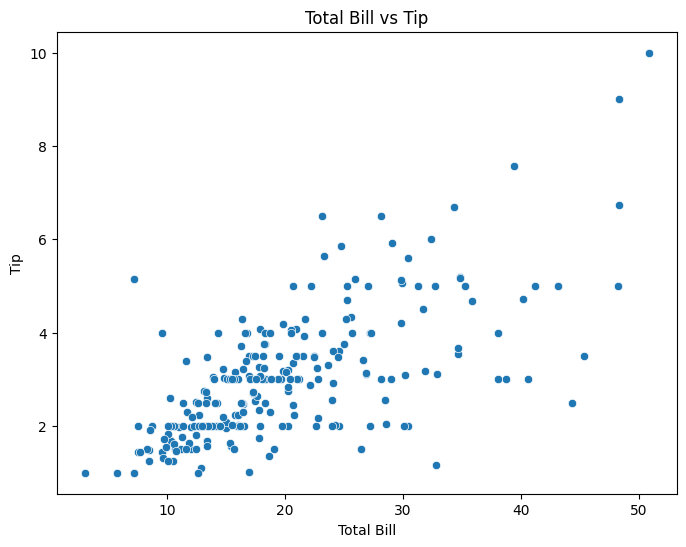

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()


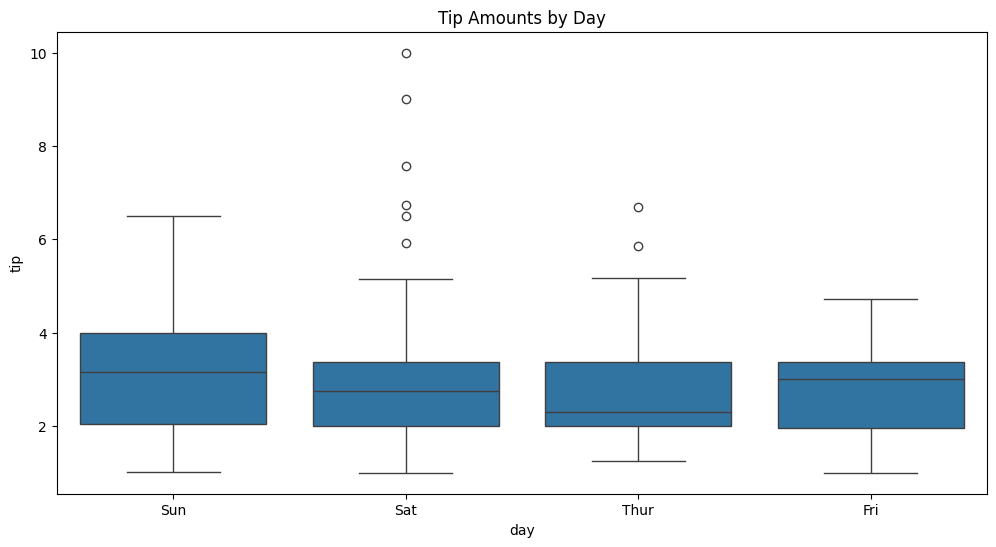

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='tip', data=tips)
plt.title('Tip Amounts by Day')
plt.show()


**Apply Linear Regression**

In [9]:
tips_encoded = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)


In [10]:
tips_encoded.head()


,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [11]:
X = tips_encoded[['total_bill']]
y = tips_encoded['tip']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
y_pred = model.predict(X_test)


In [15]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5688142529229536


In [16]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.5449381659234664


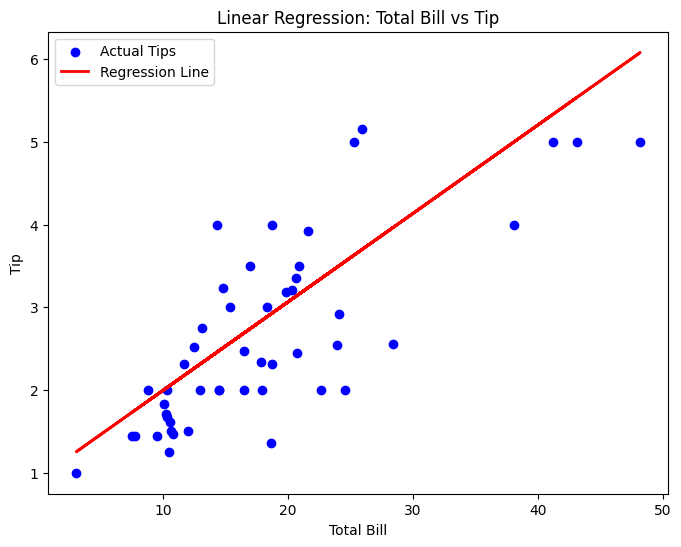

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Tips')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression: Total Bill vs Tip')
plt.legend()
plt.show()
